In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [2]:
categories = ['ant','bat','bird','camel','cat','cow','crab','dog','dragon','elephant','fish','frog','giraffe','horse','mouse','apple','banana','grapes','pear','pineapple','airplane','bicycle','bus','car','submarine','truck']

In [3]:
!mkdir npy

# New Section

In [4]:
cat_limit = categories[:25]
cat_limit

['ant',
 'bat',
 'bird',
 'camel',
 'cat',
 'cow',
 'crab',
 'dog',
 'dragon',
 'elephant',
 'fish',
 'frog',
 'giraffe',
 'horse',
 'mouse',
 'apple',
 'banana',
 'grapes',
 'pear',
 'pineapple',
 'airplane',
 'bicycle',
 'bus',
 'car',
 'submarine']

In [5]:
import urllib.request


def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy 1/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 3/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy 4/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy 5/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy 6/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy 7/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy 8/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dragon.npy 9/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/elephant.npy 10/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fish.npy 11/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/frog.npy 12/25
https://storage.googlea

In [44]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [79]:
X = np.empty([0, 784])
y = np.empty([0])
label_names = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 15000, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  label_name, extension = os.path.splitext(os.path.basename(file))
  label_names.append(label_name)

71420
horse


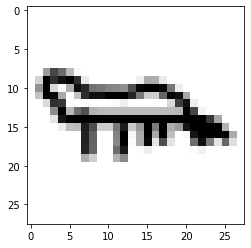

In [45]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [74]:
label_names

['banana',
 'ant',
 'bird',
 'cow',
 'dog',
 'horse',
 'elephant',
 'pineapple',
 'apple',
 'grapes',
 'bus',
 'crab',
 'camel',
 'giraffe',
 'car',
 'bat',
 'cat',
 'frog',
 'mouse',
 'airplane',
 'fish',
 'dragon',
 'bicycle',
 'submarine',
 'pear']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [81]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [82]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [83]:
X_train.shape[0]

300000

In [84]:
X_train.shape

(300000, 28, 28, 1)

In [85]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=25)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=25)
# y_train = tf.convert_to_tensor(y_train)
# y_test = tf.convert_to_tensor(y_test)

In [86]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(75000, 25).(300000, 25)
(75000, 28, 28, 1),(300000, 28, 28, 1)


(300000, 25)

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
#   .shuffle(2500).batch(32)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
#   .batch(32)

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)
# print(train_dataset.element_spec)

In [87]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

# top_k=tf.keras.metrics.top_k_categorical_accuracy(k=3)
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy','top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 64)         

In [88]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=6)

Epoch 1/6
1055/1055 - 9s - loss: 1.2889 - accuracy: 0.6265 - top_k_categorical_accuracy: 0.8689 - val_loss: 0.9210 - val_accuracy: 0.7296 - val_top_k_categorical_accuracy: 0.9309
Epoch 2/6
1055/1055 - 9s - loss: 0.8066 - accuracy: 0.7637 - top_k_categorical_accuracy: 0.9423 - val_loss: 0.7587 - val_accuracy: 0.7768 - val_top_k_categorical_accuracy: 0.9468
Epoch 3/6
1055/1055 - 9s - loss: 0.6902 - accuracy: 0.7966 - top_k_categorical_accuracy: 0.9535 - val_loss: 0.7122 - val_accuracy: 0.7922 - val_top_k_categorical_accuracy: 0.9511
Epoch 4/6
1055/1055 - 9s - loss: 0.6288 - accuracy: 0.8141 - top_k_categorical_accuracy: 0.9587 - val_loss: 0.6551 - val_accuracy: 0.8077 - val_top_k_categorical_accuracy: 0.9552
Epoch 5/6
1055/1055 - 9s - loss: 0.5876 - accuracy: 0.8254 - top_k_categorical_accuracy: 0.9627 - val_loss: 0.6313 - val_accuracy: 0.8152 - val_top_k_categorical_accuracy: 0.9568
Epoch 6/6
1055/1055 - 9s - loss: 0.5546 - accuracy: 0.8343 - top_k_categorical_accuracy: 0.9652 - val_los

In [89]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

2344/2344 [==============================] - 7s 3ms/step - loss: 0.6145 - accuracy: 0.8174 - top_k_categorical_accuracy: 0.9590
Test accuracy: 81.74%


194028
bee


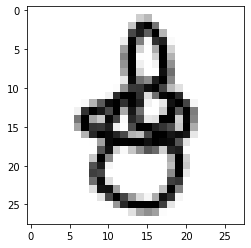

In [19]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [90]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 144.4MB 107kB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 256kB 54.3MB/s 
     |████████████████████████████████| 921kB 54.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=856f9f52a6bc74934a5f2803a6c0131edc16504eddf5427903de6bd7785a7e18
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installatio

In [96]:
with open('easyCategories.json', 'w') as outputFile:
  json.dump(label_names, outputFile)

In [97]:
model.save('kerasEasy25.h5')

In [98]:
!mkdir model

In [99]:
!tensorflowjs_converter --input_format keras kerasEasy25.h5 model/

In [100]:
!cp easyCategories.json model/easyCategories.json

In [102]:
!zip -r modelEasy25.zip model

  adding: model/ (stored 0%)
  adding: model/easyCategories.json (deflated 45%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 87%)


In [103]:
from google.colab import files
files.download('modelEasy25.zip')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

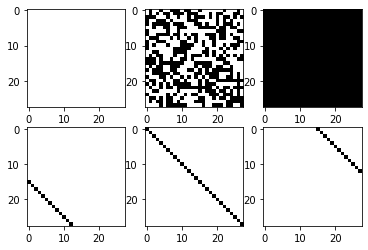

In [ ]:
rand = np.floor(np.random.random((28,28)) + .5)
all_black = np.full((28,28, 3), 0)
all_white = np.ones((28,28))
diag = np.eye(28)
diag_low = np.eye(28, k=-15)
diag_high = np.eye(28, k=15)

plt.subplot(231)
plt.imshow(all_white, cmap='binary')
plt.subplot(232)
plt.imshow(rand, cmap='binary')
plt.subplot(233)
plt.imshow(all_black, cmap='binary')
plt.subplot(234)
plt.imshow(diag_low, cmap='binary')
plt.subplot(235)
plt.imshow(diag, cmap='binary')
plt.subplot(236)
plt.imshow(diag_high, cmap='binary')

In [ ]:
first6 = cat_limit[:6]
first6

['ant', 'bat', 'bear', 'bee', 'bird', 'butterfly']

In [ ]:
dummy_files = glob.glob(os.path.join('npy', '*.npy'))
dummy_data = []
for index, file in enumerate(dummy_files):
  test_data = np.load(file)
  dummy_data.append(test_data[:])

You can change which category of doodles by changing the index number of dummy_data below.

In [ ]:
category_array = np.array(dummy_data[0])
category_array.shape

(124612, 784)

Set up to take select a random image from the corresponding category and reshapes it so it is plot-able.

Feel free to select your own index if you prefer.

In [ ]:
plot_me = category_array[random.randrange(len(category_array[0]))]
plot_me = plot_me.reshape(28,28)

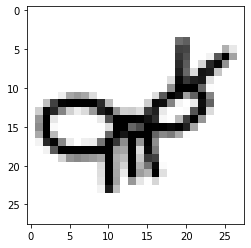

In [ ]:
plt.imshow(plot_me, cmap='binary')

In [ ]:
butterfly = dummy_files[1]

In [ ]:
butterfly_data = np.load(butterfly)
butterfly_data.shape

(117999, 784)

In [104]:
ones =np.ones([28,28])
ones=ones.reshape(1,28,28,1)

In [105]:
model.predict(ones)

array([[0.05005997, 0.01184717, 0.04558736, 0.04362584, 0.02204407,
        0.06559951, 0.05600084, 0.02055573, 0.05122136, 0.02558563,
        0.00980531, 0.02383332, 0.05444693, 0.02104958, 0.01648631,
        0.09021016, 0.05272031, 0.04814658, 0.01485575, 0.03192919,
        0.01324272, 0.15478133, 0.00801054, 0.03575868, 0.03259582]],
      dtype=float32)

In [106]:
zeros =np.zeros([28,28])
zeros=zeros.reshape(1,28,28,1)
model.predict(zeros)

array([[0.02020535, 0.1562366 , 0.05586105, 0.03443788, 0.03176537,
        0.03282676, 0.0322974 , 0.01527396, 0.02775441, 0.06543364,
        0.0307864 , 0.03830386, 0.02638768, 0.02407292, 0.04167271,
        0.04052861, 0.01413848, 0.05032329, 0.03085005, 0.05697093,
        0.04769019, 0.02509855, 0.03176983, 0.03484134, 0.03447267]],
      dtype=float32)

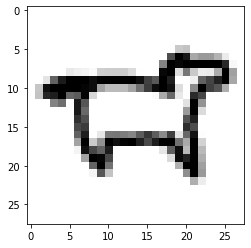

In [109]:
testI=18
plt.imshow(X_test[testI].reshape(28,28), cmap='binary')

In [110]:
prediction = model.predict(tf.expand_dims(tf.reshape(X_test[testI],[28,28,1]),0))
i=0
maxI = 0
max = prediction[0][0]
for i in range(len(prediction[0])):
  if (prediction[0][i]>max):
    max = prediction[0][i]
    maxI=i
  i+=1
print(label_names[maxI])
# print(categories[y_test[150]])
print(max)
for ind in range(len(y_test[testI])):
  if y_test[testI][ind]==1:
    print(label_names[ind])

horse
0.79343593
horse
